In this notebook, we want to summarize the data and make sure that it is behaving as we expect based on previous literature. Here, we want to only use the outcome for multnom_out (which is TxE vs rHGG)

In [1]:
recgli = read.csv("../../ParseData/9thParse_researchPath_withInVivo.csv") 
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [2]:
table(recgli$multnom_out)
table(is.na(recgli$multnom_out))

recgli[which(is.na(recgli$phn_nlin) & !is.na(recgli$cbvn_nlin)),]


rHGG  TxE 
 239   83 


FALSE 
  322 

,b_number,t_number,sf_number,current_scan_date,current_surgery_date,current_hist_grade,current_hist_type,roi.label,tumor_cell_evaluation,necrosis,f8_delicate,f8_simple,f8_complex,mib_1,bx_pure_treatment_effect,nfse,nfl,nt1c,nt1v,nadc.1,nfa.1,nev1.1,nev2.1,nev3.1,nevrad.1,nadc.2,nfa.2,nev1.2,nev2.2,nev3.2,nevrad.2,cbvn_nlin,phn_nlin,phn_npar,recovn_npar,cni,ccri,crni,ncho,ncre,nnaa,nlip,laclip,nlac,olddata,newdata,comments,notes.,imaging_code,perf_quant,cbv_nlin,spec_quant,include_anat,include_diffu1000,include_diffu2000,include_diffu_all,include_perf,include_spec,include_one_advanced_mod,include_all_advanced_mods,X.CEL,X.NEL,X.NEC,sum,in_CEL,in_T2all,in_NEL,in_NEC,in_ROI,desired_hist,multnom_out,no_ffpe,waiting_on_path,rhgg_txe_analysis
11,2793,7584,8842,7/28/11,7/28/11,Grade IV,Glioblastoma,15B44,2,1,2,1,0,9.42,f,2.66,1.01,1.55,0.63,0.720000,0.5000000,0.630000,0.7000000,0.890000,0.790000,NA,1.28,2.67,2.31,2.16,2.30,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,NA,all_zeros,NA,NA,1,1,1,1,0,0,1,0,22.50,0.00,NA,22.50,1,0,0,0,1,1,rHGG,0,0,1
16,963,6069,7984,3/24/09,3/25/09,Grade IV,Glioblastoma,18B24,3,0,2,3,0,26.85,f,3.20,1.48,0.98,NA,2.040000,0.7600000,1.880000,2.1800000,2.140000,2.210000,NA,NA,NA,NA,NA,NA,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,NA,all_zeros,NA,NA,1,1,0,1,0,0,1,0,NA,NA,NA,NA,0,1,1,0,1,1,rHGG,0,0,1
20,2384,5603,7759,8/3/08,8/4/08,Grade III,Astrocytoma,21B18,2,0,2,2,0,5.02,f,1.86,1.38,1.63,0.67,1.470000,0.5400000,1.300000,1.4800000,1.820000,1.640000,NA,NA,NA,NA,NA,NA,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,NA,all_zeros,NA,NA,1,1,0,1,0,0,1,0,100.00,0.00,NA,100.00,1,1,0,0,1,1,rHGG,0,0,1
21,2384,5603,7759,8/3/08,8/4/08,Grade III,Astrocytoma,22B18,2,0,2,0,0,1.43,f,1.92,1.24,1.44,0.59,0.910000,0.3600000,0.810000,0.9200000,1.110000,1.010000,NA,NA,NA,NA,NA,NA,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,NA,all_zeros,NA,NA,1,1,0,1,0,0,1,0,66.67,14.29,NA,80.96,1,0,0,0,1,1,rHGG,0,0,1
24,3171,7553,8804,6/24/11,6/27/11,Treatment Effect,Treatment Effect,25B43,0,0,0,0,0,0.00,t,0.66,0.54,1.11,0.87,0.850000,1.7500000,1.040000,0.9000000,0.600000,0.800000,0.67,1.53,0.87,0.55,0.32,0.46,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,90% BV wall,NA,NA,all_zeros,NA,NA,1,1,1,1,0,0,1,0,NA,NA,NA,NA,0,0,0,0,0,1,TxE,0,0,1
25,2192,8070,7540,11/18/07,11/19/07,Grade IV,Glioblastoma,26B13,2,0,3,2,0,8.11,f,1.44,0.99,0.86,0.84,1.230000,1.0400000,1.130000,1.1700000,1.280000,1.270000,NA,NA,NA,NA,NA,NA,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,"necrosis on H&E<5%; PV tumor cells, on deeper sections ~20% of tissue is Tumor score=3",NA,NA,all_zeros,NA,NA,1,1,0,1,0,0,1,0,0.00,NA,NA,0.00,0,0,0,0,0,1,rHGG,0,0,1
43,3043,7227,8580,12/16/10,12/27/10,Treatment Effect,Treatment Effect,35B39,0,0,Indeterminable,Indeterminable,Indeterminable,0.00,f,1.51,1.32,0.95,0.81,1.830000,0.9400000,1.550000,1.7600000,2.250000,2.030000,1.57,1.09,1.54,1.49,1.61,1.55,0.00,NA,NA,NA,-1.62,-0.28,-1.47,0.19,0.23,0.65,0.29,0.60,0.31,1,0,"tiny, unable to fully evaluate",NA,NA,all_zeros,NA,0,1,1,1,1,0,1,1,0,0.00,50.00,NA,50.00,0,1,1,0,1,1,TxE,0,0,1
50,1556,5535,7725,7/1/08,7/2/08,Grade IV,Glioblastoma,39B17,2,0,1,3,2,15.39,f,1.76,1.47,1.26,0.62,1.440000,0.8200000,1.260000,1.4900000,1.720000,1.620000,1.44,0.97,1.42,1.39,1.47,1.47,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,NA,all_zeros,NA,NA,1,1,1,1,0,0,1,0,60.71,39.29,NA,100.00,1,1,0,0,1,1,rHGG,0,0,1
70,2842,6619,8243,2/12/10,2/16/10,Grade IV,Glioblastoma,53B31,0,0,3,0,0,0.60,t,2.48,1.76,2.30,0.60,2.490000,0.7000000,2.150000,2.4400000,3.240000,2.870000,2.69,0.92,2.48,2.63,2.80,2.82,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,NA,all_zeros,NA,NA,1,1,1,1,0,0,1,0,96.55,0.00,0.0,96.55,1,1,0,0,1,1,TxE,0,0,1
72,2842,6619,8243,2/12/10,2/16/10,Grade IV,Glioblastoma,55B31,0,0,3,0,0,0.64,t,1.90,2.48,0.90,0.87,1.620000,0.6300000,1.350000,1.6400000,2.140000,1.940000,1.55,0.97,1.45,1.43,1.75,1.63,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,NA,all_zeros,NA,NA,1,1,1,1,0,0,1,0,0.00,68.97,0.0,68.97,0,1,1,0,1,1

In [7]:
dim(recgli[which(recgli$include_spec ==1),])

[1] 138  74

In [8]:
recgli.spec = recgli[which(recgli$include_spec ==1),]

In [9]:
recgli = recgli.spec 

In [3]:
library(lme4)
library(geepack)
library(glmm)
library(ez)

Loading required package: Matrix
Loading required package: trust
Loading required package: mvtnorm
Loading required package: digest


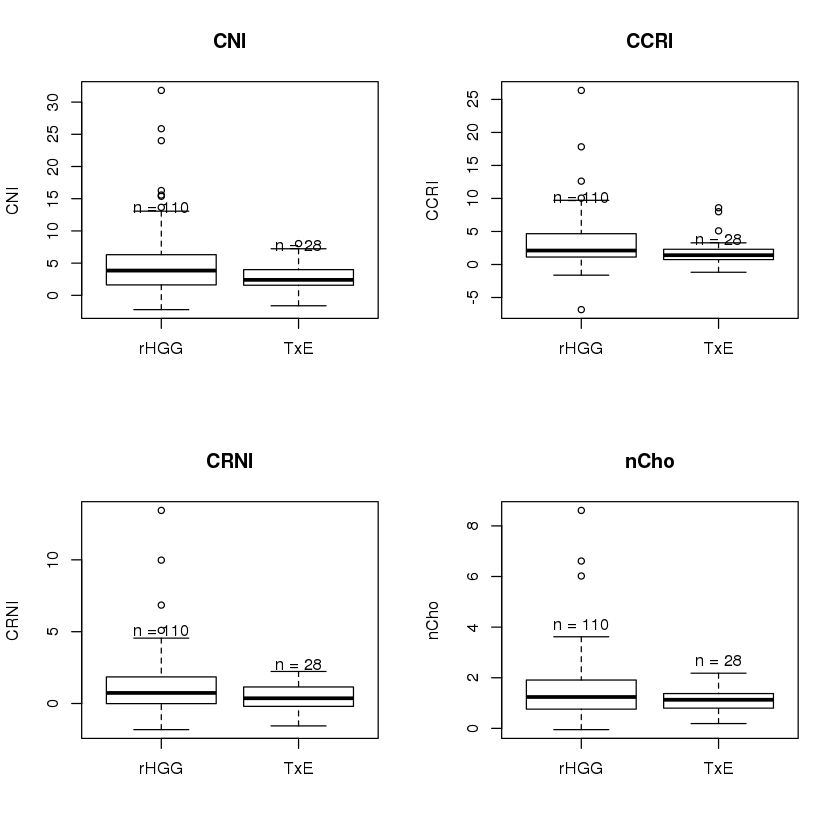

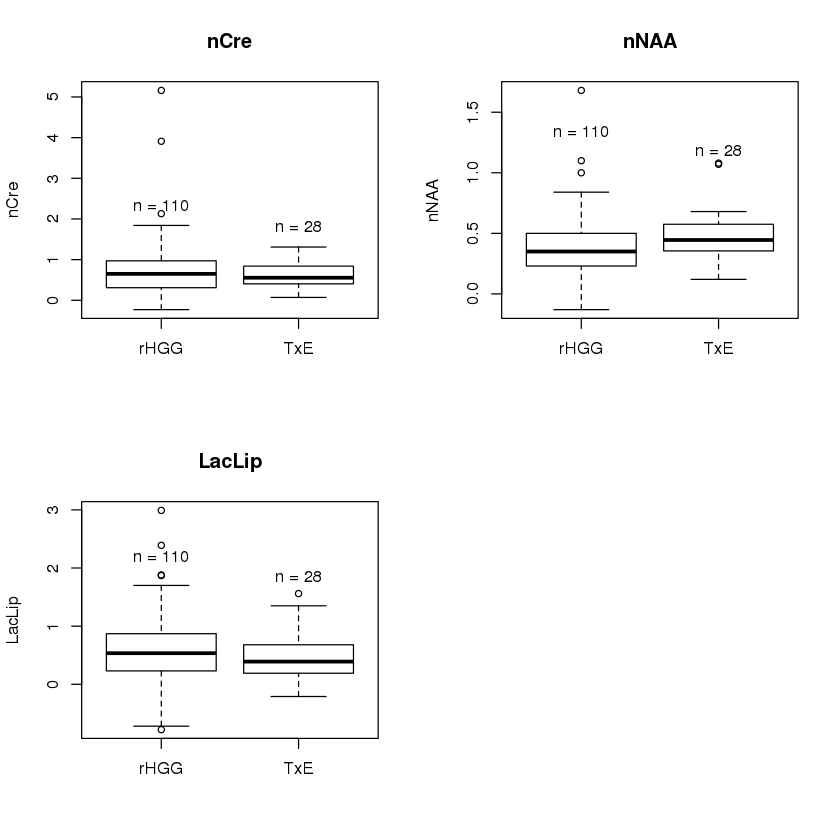

In [10]:
par(mfrow = c(2, 2))
a = boxplot(cni ~ multnom_out , data = recgli, ylab = "CNI", main = "CNI")
text( c(1:nlevels(factor(recgli$multnom_out))) , a$stats[nrow(a$stats) , ]+0.5 , paste("n = ",table(recgli$multnom_out),sep="")  )

b = boxplot(ccri ~ multnom_out , data = recgli, ylab = "CCRI", main = "CCRI")
text( c(1:nlevels(factor(recgli$tumor_cell_evaluation))) , b$stats[nrow(b$stats) , ]+0.5 , paste("n = ",table(recgli$multnom_out),sep="")  )

c = boxplot(crni ~ multnom_out , data = recgli, ylab = "CRNI", main = "CRNI")
text( c(1:nlevels(factor(recgli$multnom_out))) , c$stats[nrow(c$stats) , ]+0.5 , paste("n = ",table(recgli$multnom_out),sep="")  )

d = boxplot(ncho ~ multnom_out , data = recgli, ylab = "nCho", main = "nCho")
text( c(1:nlevels(factor(recgli$multnom_out))) , d$stats[nrow(d$stats) , ]+0.5 , paste("n = ",table(recgli$multnom_out),sep="")  )

e = boxplot(ncre ~ multnom_out , data = recgli, ylab = "nCre", main = "nCre")
text( c(1:nlevels(factor(recgli$multnom_out))) , e$stats[nrow(d$stats) , ]+0.5 , paste("n = ",table(recgli$multnom_out),sep="")  )

f = boxplot(nnaa ~ multnom_out , data = recgli, ylab = "nNAA", main = "nNAA")
text( c(1:nlevels(factor(recgli$multnom_out))) , f$stats[nrow(d$stats) , ]+0.5 , paste("n = ",table(recgli$multnom_out),sep="")  )

g = boxplot(laclip ~ multnom_out , data = recgli, ylab = "LacLip", main = "LacLip")
text( c(1:nlevels(factor(recgli$multnom_out))) , g$stats[nrow(d$stats) , ]+0.5 , paste("n = ",table(recgli$multnom_out),sep="")  )


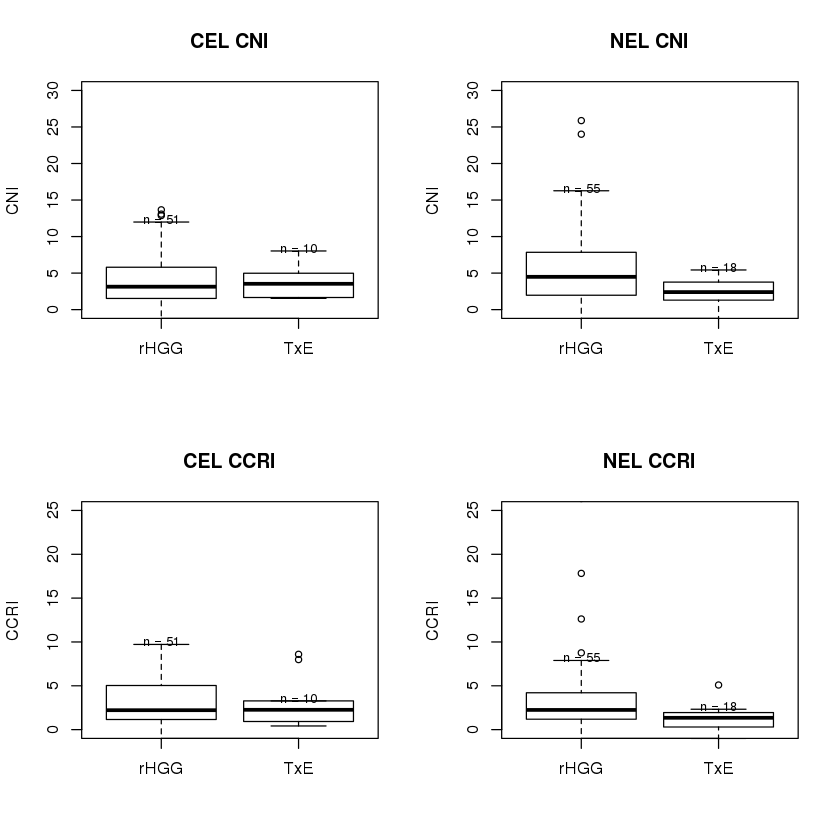

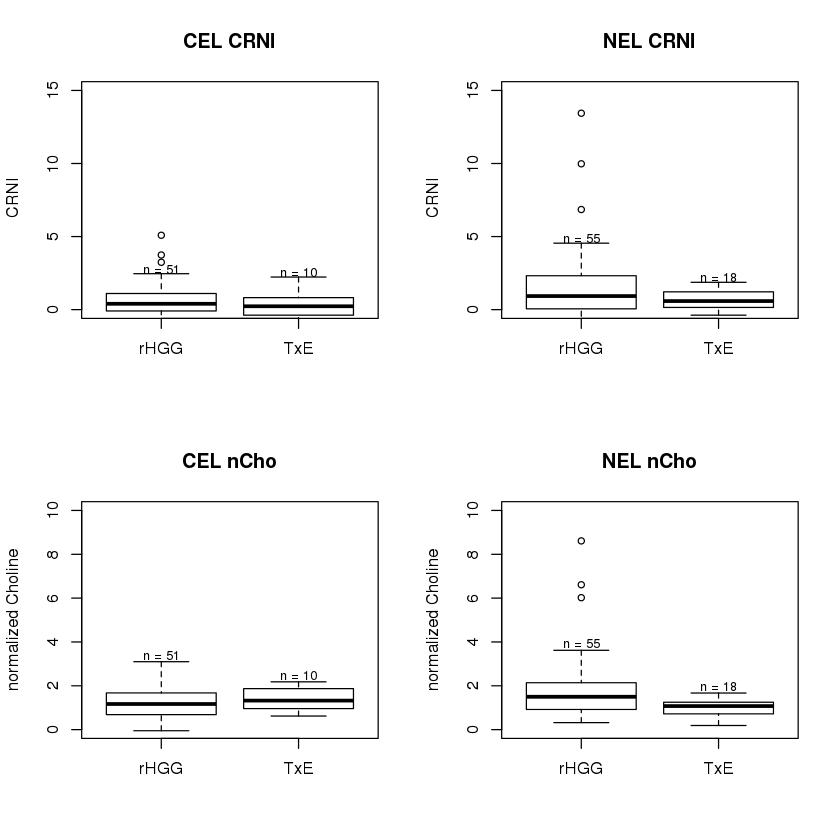

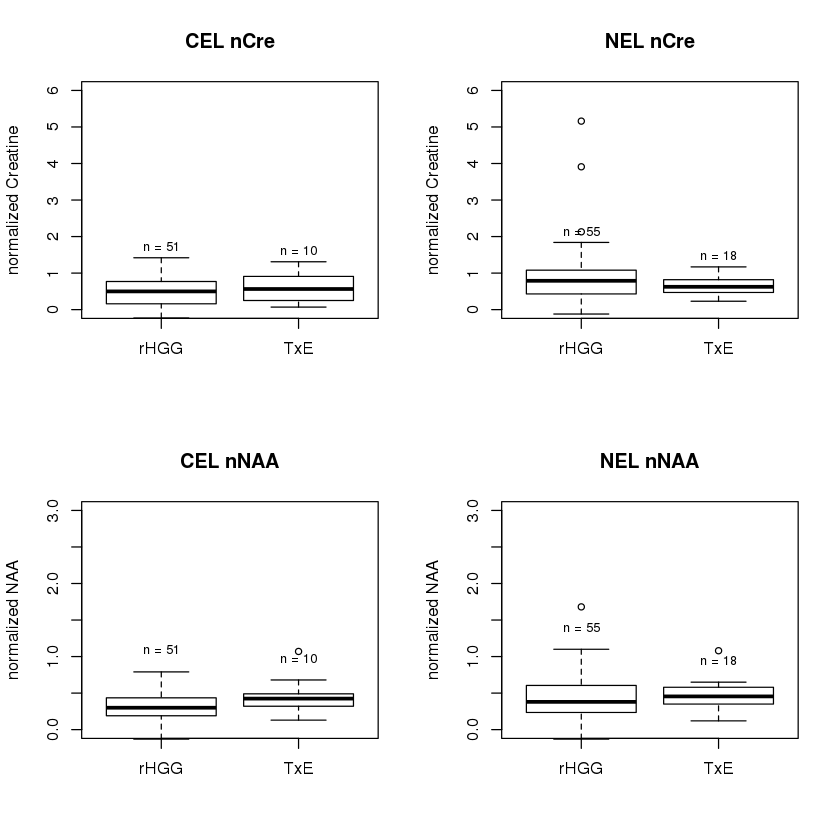

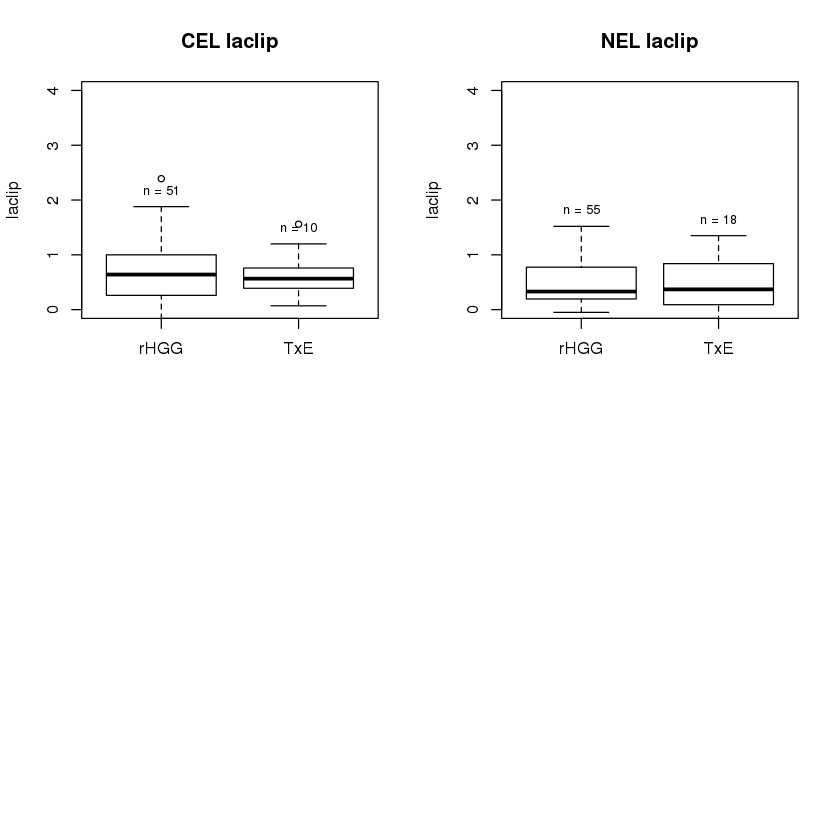

In [11]:
par(mfrow = c(2, 2))
a = boxplot(cni ~ multnom_out , data = recgli[recgli$in_CEL ==1,], ylab = "CNI", main = "CEL CNI", ylim = c(0,30))
text( c(1:nlevels(factor(recgli$multnom_out))) , a$stats[nrow(a$stats) , ]+.3 , paste("n = ",table(recgli[which(recgli$in_CEL ==1),]$multnom_out),sep=""), cex = 0.8)
b = boxplot(cni ~ multnom_out , data = recgli[recgli$in_NEL ==1,], ylab = "CNI", main = "NEL CNI", ylim = c(0,30))
text( c(1:nlevels(factor(recgli$multnom_out))) , b$stats[nrow(b$stats) , ]+.3 , paste("n = ",table(recgli[which(recgli$in_NEL ==1),]$multnom_out),sep=""), cex = 0.8)

c = boxplot(ccri ~ multnom_out , data = recgli[recgli$in_CEL ==1,], ylab = "CCRI", main = "CEL CCRI", ylim = c(0,25))
text( c(1:nlevels(factor(recgli$multnom_out))) , c$stats[nrow(c$stats) , ]+.3 , paste("n = ",table(recgli[which(recgli$in_CEL ==1),]$multnom_out),sep=""), cex = 0.8)
d = boxplot(ccri ~ multnom_out , data = recgli[recgli$in_NEL ==1,], ylab = "CCRI", main = "NEL CCRI", ylim = c(0,25))
text( c(1:nlevels(factor(recgli$multnom_out))) , d$stats[nrow(d$stats) , ]+.3 , paste("n = ",table(recgli[which(recgli$in_NEL ==1),]$multnom_out),sep=""), cex = 0.8)

e = boxplot(crni ~ multnom_out , data = recgli[recgli$in_CEL ==1,], ylab = " CRNI", main = "CEL CRNI", ylim = c(0,15))
text( c(1:nlevels(factor(recgli$multnom_out))) , e$stats[nrow(e$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_CEL ==1,]$multnom_out),sep=""), cex = 0.8)
f = boxplot(crni ~ multnom_out , data = recgli[recgli$in_NEL ==1,], ylab = " CRNI", main = "NEL CRNI", ylim = c(0,15))
text( c(1:nlevels(factor(recgli$multnom_out))) , f$stats[nrow(f$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_NEL ==1,]$multnom_out),sep=""), cex = 0.8)

g = boxplot(ncho ~ multnom_out , data = recgli[recgli$in_CEL ==1,], ylab = "normalized Choline", main = "CEL nCho", ylim = c(0, 10))
text( c(1:nlevels(factor(recgli$multnom_out))) , g$stats[nrow(g$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_CEL ==1,]$multnom_out),sep=""), cex = 0.8)
h = boxplot(ncho ~ multnom_out , data = recgli[recgli$in_NEL ==1,], ylab = "normalized Choline", main = "NEL nCho", ylim = c(0, 10))
text( c(1:nlevels(factor(recgli$multnom_out))) , h$stats[nrow(h$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_NEL ==1,]$multnom_out),sep=""), cex = 0.8)

i = boxplot(ncre ~ multnom_out , data = recgli[recgli$in_CEL ==1,], ylab = "normalized Creatine", main = "CEL nCre", ylim = c(0, 6))
text( c(1:nlevels(factor(recgli$multnom_out))) , i$stats[nrow(g$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_CEL ==1,]$multnom_out),sep=""), cex = 0.8)
j = boxplot(ncre ~ multnom_out , data = recgli[recgli$in_NEL ==1,], ylab = "normalized Creatine", main = "NEL nCre", ylim = c(0, 6))
text( c(1:nlevels(factor(recgli$multnom_out))) , j$stats[nrow(h$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_NEL ==1,]$multnom_out),sep=""), cex = 0.8)

k = boxplot(nnaa ~ multnom_out , data = recgli[recgli$in_CEL ==1,], ylab = "normalized NAA", main = "CEL nNAA", ylim = c(0, 3))
text( c(1:nlevels(factor(recgli$multnom_out))) , k$stats[nrow(g$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_CEL ==1,]$multnom_out),sep=""), cex = 0.8)
l = boxplot(nnaa ~ multnom_out , data = recgli[recgli$in_NEL ==1,], ylab = "normalized NAA", main = "NEL nNAA", ylim = c(0, 3))
text( c(1:nlevels(factor(recgli$multnom_out))) , l$stats[nrow(h$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_NEL ==1,]$multnom_out),sep=""), cex = 0.8)

m = boxplot(laclip ~ multnom_out , data = recgli[recgli$in_CEL ==1,], ylab = "laclip", main = "CEL laclip", ylim = c(0, 4))
text( c(1:nlevels(factor(recgli$multnom_out))) , m$stats[nrow(g$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_CEL ==1,]$multnom_out),sep=""), cex = 0.8)
n = boxplot(laclip ~ multnom_out , data = recgli[recgli$in_NEL ==1,], ylab = "laclip", main = "NEL laclip", ylim = c(0, 4))
text( c(1:nlevels(factor(recgli$multnom_out))) , n$stats[nrow(h$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_NEL ==1,]$multnom_out),sep=""), cex = 0.8)
